In [1]:
pip install fredapi

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import time
from fredapi import Fred



In [12]:

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [16]:
fred_key = "622106dbb61c56120bdea08e17edfdde"

Create Object


In [14]:
fred = Fred(api_key=fred_key)

Search economic data


In [21]:
sp_search = fred.search('S&P', order_by ="popularity")

In [18]:
sp_search.shape

(1000, 15)

Pull Data and Plot

<AxesSubplot:title={'center':'SP 500'}>

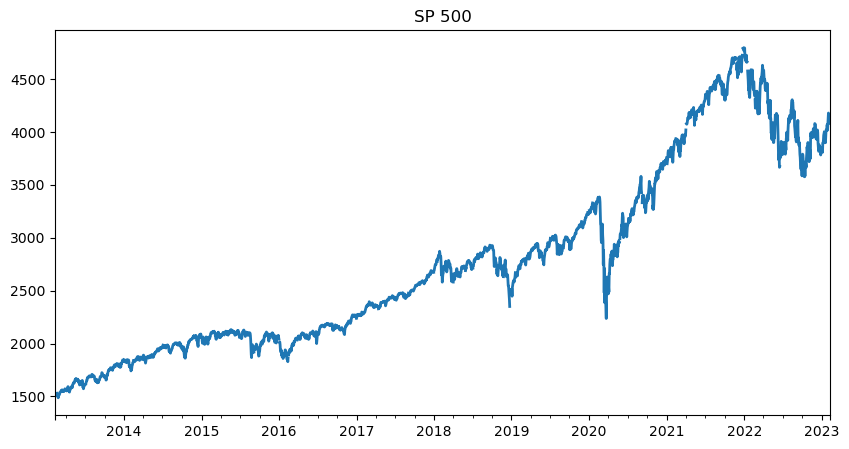

In [23]:
sp500 = fred.get_series(series_id = "SP500")
sp500.plot(figsize=(10,5), title="SP 500", lw=2)

Pull and Join Multiple Data Series

<AxesSubplot:>

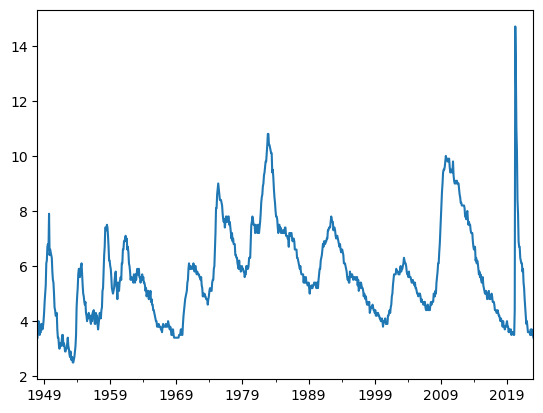

In [24]:
unemp_results = fred.search('unemployment')
unrate = fred.get_series("UNRATE")
unrate.plot()

In [36]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [37]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-02-13   2023-02-13   
LNS14000006            LNS14000006     2023-02-13   2023-02-13   
CAUR                          CAUR     2023-02-13   2023-02-13   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-02-13   2023-02-13   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-02-13   2023-02-13   
...                            ...            ...          ...   
CNEWUR                      CNEWUR     2023-02-13   2023-02-13   
LNS14000061            LNS14000061     2023-02-13   2023-02-13   
LNS14023569            LNS14023569     2023-02-13   2023-02-13   
LNS14000150            LNS14000150     2023-02-13   2023-02-13   
LRUN25TTUSM156S    LRUN25TTUSM156S     2023-02-13   2023-02-13   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
CNEWUR             Unemployment Rate in New England Census Division   
LNS14000061                     Unemployment Rate - 25-54 Yrs., Men   
LNS14023569                        Unemployment Rate - New Entrants   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Unemployment Rate: Aged 25-54: All Persons for...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-01-01   Monthly               M   
LNS14000006             1972-01-01      2023-01-01   Monthly               M   
CAUR                    1976-01-01      2022-12-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
CNEWUR                  1976-01-01      2022-12-01   Monthly               M   
LNS14000061             1948-01-01      2023-01-01   Monthly               M   
LNS14023569             1967-01-01      2023-01-01   Monthly               M   
LNS14000150             1955-01-01      2023-01-01   Monthly               M   
LRUN25TTUSM156S         1960-01-01      2022-12-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
CNEWUR            Percent           %  Seasonally Adjusted   
LNS14000061       Percent           %  Seasonally Adjusted   
LNS14023569       Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-02-03 07:44:02-06:00   
LNS14000006                             SA  2023-02-03 07:44:12-06:00   
CAUR                                    SA  2023-01-25 08:27:02-06:00   
M0892AUSM156SNBR                    

In [40]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [43]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [44]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

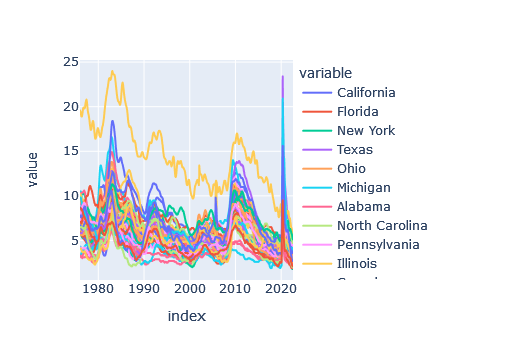

In [45]:
px.line(uemp_states)

Pull April 2020 Unemployment Rate Per State

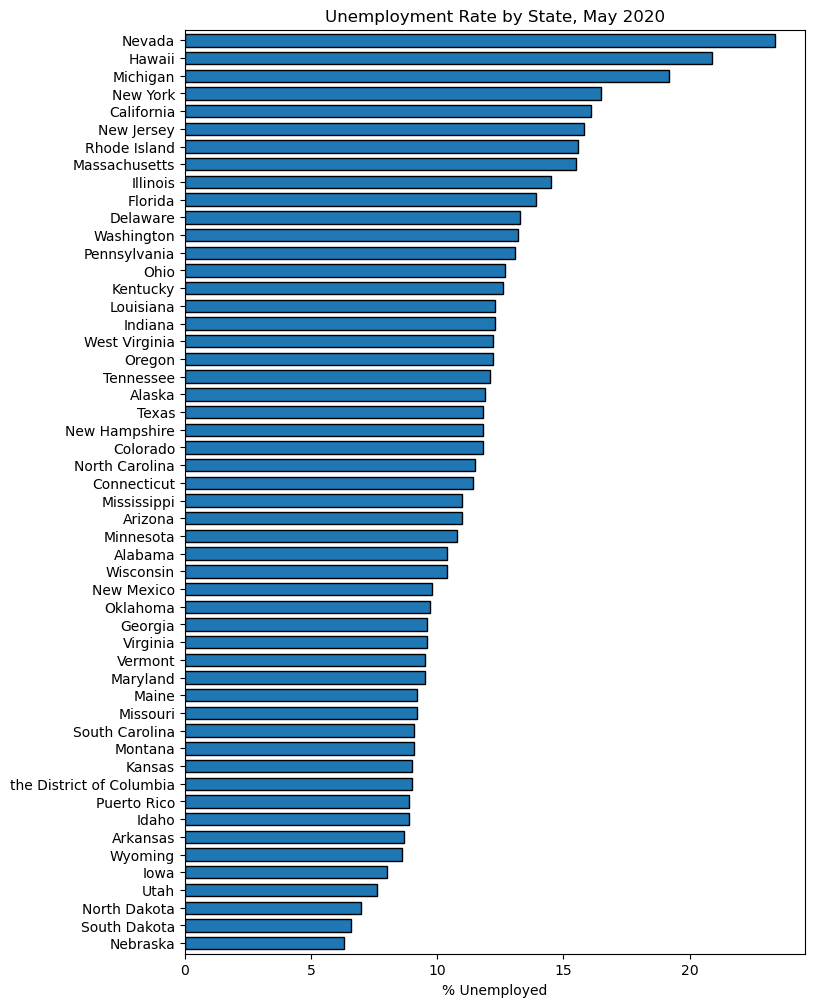

In [46]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()


Pull Participation Rate

In [47]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [48]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

Plot Unemployment vs Participation for each state!

In [49]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

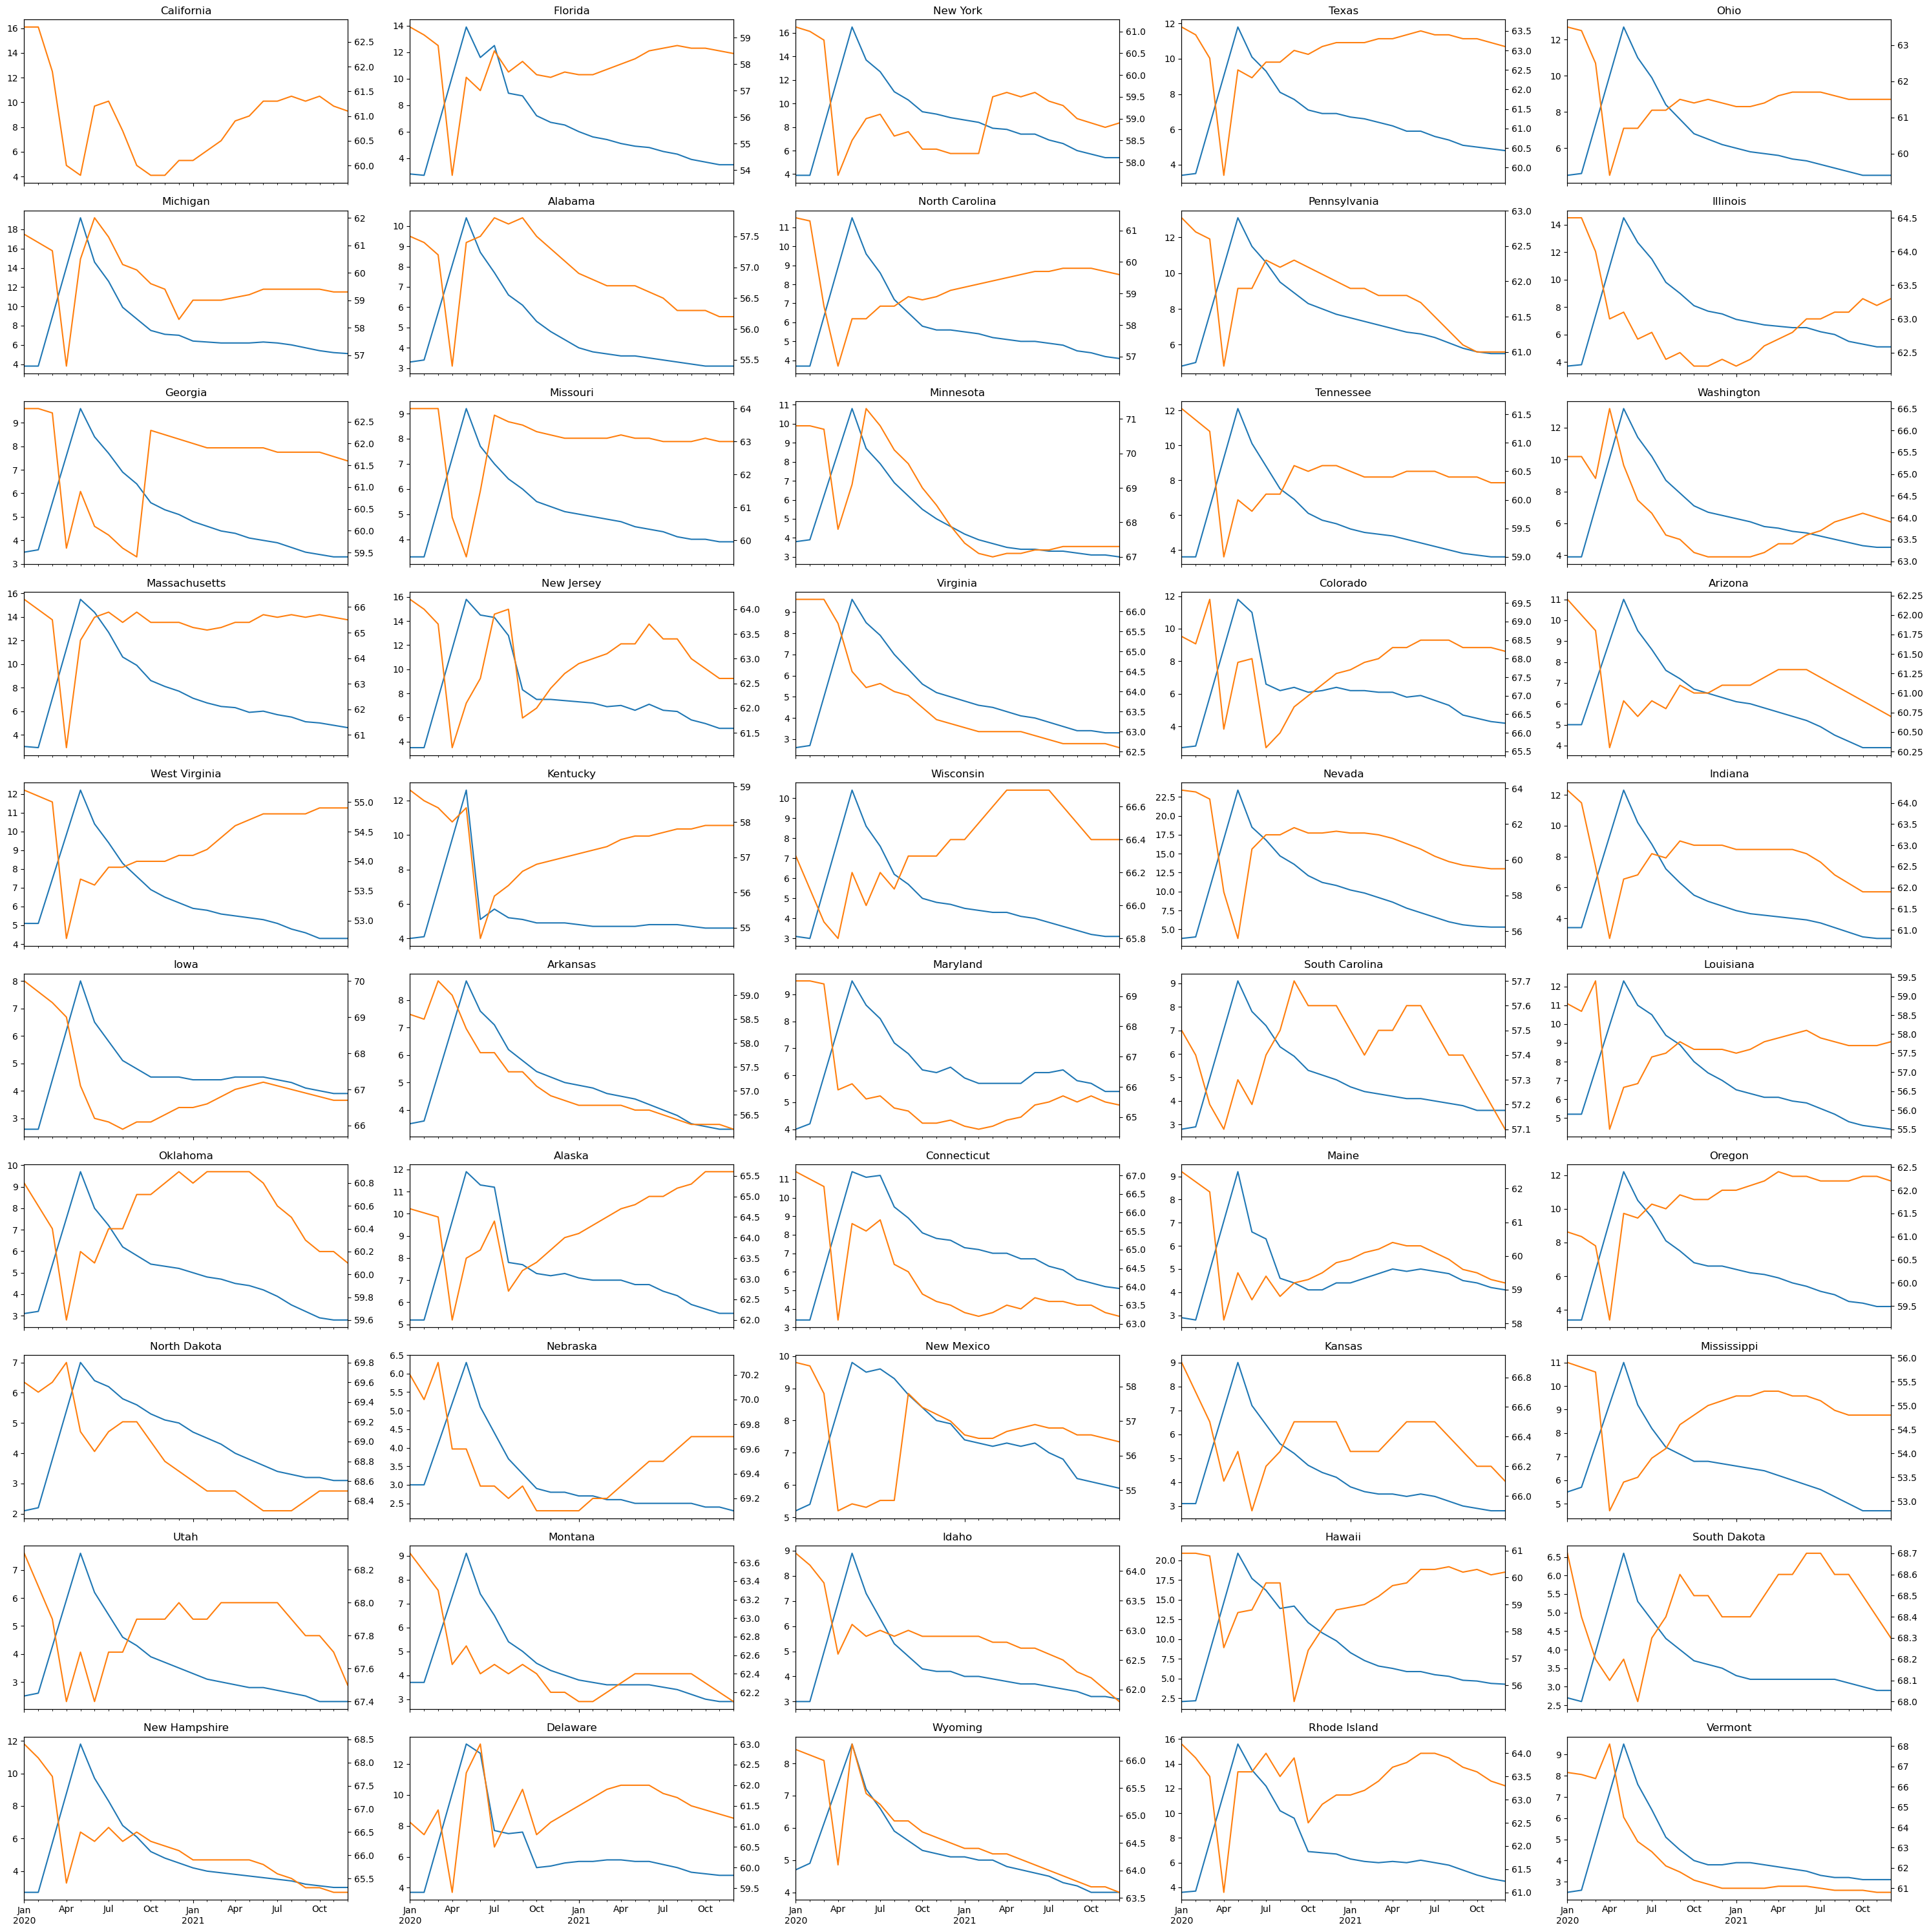

In [50]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

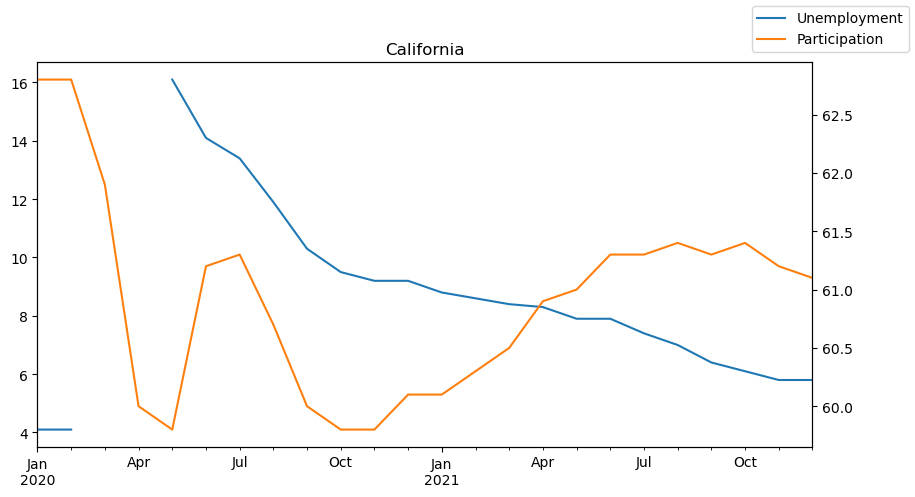

In [51]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()